correlate centrality vs porgreen? Plot r^2 through time?<br>
Results: No correlation

In [2]:
import igraph
import copy
import scipy.stats
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

%matplotlib inline

In [3]:
path_to_matrices = "matrix_csvs/"
years = ["2004"] + ["2007"] + [str(i) for i in range(2014,2018)] #list of all years
quarters = [".0", ".25", ".5", ".75"] #list of all quarters

In [10]:
#Stating period for analisis
y_index = 1
q_index = 3
current_year = years[y_index] + quarters[q_index] #The year and quarter we will do the analisis for

#Importing the files needed
df_all = pd.read_csv(path_to_matrices + current_year + "_all_projection.csv")
names = list(df_all.columns[1:]) #Getting names of nodes
n_countries = len(names)
print n_countries
ADJ_all = np.loadtxt(open(path_to_matrices + current_year + "_all_projection.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
#files are empty
#pd.read_csv(path_to_matrices + current_year + "_blue_projection.csv")
#Adjmat_blue = np.loadtxt(open(path_to_matrices + current_year + "_blue_projection.csv", "rb"), delimiter=",", skiprows=1, 
           #usecols=range(1,n_countries+1)) #getting the adjacency matrix
#Adjmat_green = np.loadtxt(open(path_to_matrices + current_year + "_green_projection.csv", "rb"), delimiter=",", skiprows=1, 
           #usecols=range(1,n_countries+1)) #getting the adjacency matrix

219


In [11]:
path_to_matrices + current_year + "_all_projection.csv"

'matrix_csvs/2007.75_all_projection.csv'

In [7]:
#Extracting bipartite adj mat
ADJ_bip_green = np.loadtxt(open(path_to_matrices + current_year + "_green_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
ADJ_bip_blue = np.loadtxt(open(path_to_matrices + current_year + "_blue_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
#Does the all category include the green and blue or is it just the dirty ones? In principle we would like to have 
#only the dirty ones, right?
ADJ_bip_all = np.loadtxt(open(path_to_matrices + current_year + "_all_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) 
#To get the high emission plants we use the all matrix and remove the "clean" part
ADJ_bip_dirty = ADJ_bip_all - (ADJ_bip_green + ADJ_bip_blue)


#Making the company projection
ADJ_comp_green =  (ADJ_bip_green/ADJ_bip_green.sum()).dot(ADJ_bip_green.T/(ADJ_bip_green.T.sum()))
ADJ_comp_blue =  (ADJ_bip_blue/ADJ_bip_blue.sum()).dot(ADJ_bip_blue.T/(ADJ_bip_blue.T.sum()))
ADJ_comp_all =  (ADJ_bip_all/ADJ_bip_all.sum()).dot(ADJ_bip_all.T/(ADJ_bip_all.T.sum()))
ADJ_comp_dirty =  (ADJ_bip_dirty /ADJ_bip_dirty .sum()).dot(ADJ_bip_dirty.T/(ADJ_bip_dirty .T.sum()))
#Making the country projection
ADJ_country_green =  (ADJ_bip_green.T/ADJ_bip_green.T.sum()).dot(ADJ_bip_green/(ADJ_bip_green.sum()))
ADJ_country_blue =  (ADJ_bip_blue.T/ADJ_bip_blue.T.sum()).dot(ADJ_bip_blue/(ADJ_bip_blue.sum()))
ADJ_country_all =  (ADJ_bip_all.T/ADJ_bip_all.T.sum()).dot(ADJ_bip_all/(ADJ_bip_all.sum()))
ADJ_country_dirty =  (ADJ_bip_dirty.T /ADJ_bip_dirty.T .sum()).dot(ADJ_bip_dirty/(ADJ_bip_dirty.sum()))

#Getting the percentage of emissions of each type for each country
green_part = [sum(ADJ_bip_green[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]
blue_part = [sum(ADJ_bip_blue[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]
dirty_part = [sum(ADJ_bip_dirty[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]

In [11]:
G = igraph.Graph.Weighted_Adjacency(ADJ_country_green.tolist(), mode="directed")

In [14]:
auth_score = G.authority_score(weights=G.es["weight"])
hub_score = G.hub_score(weights=G.es["weight"])

(0, 0.05)

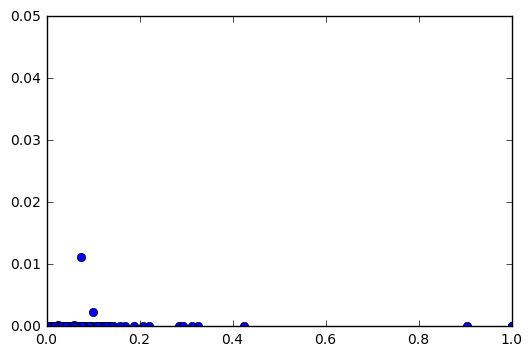

In [20]:
plt.plot(green_part, auth_score, "o")
plt.ylim(0, 0.05)

In [23]:
pagerank = G.personalized_pagerank(weights=G.es["weight"])

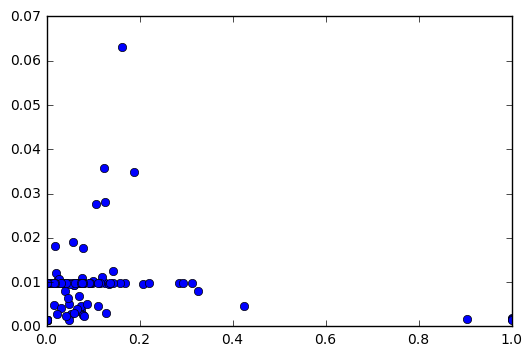

In [25]:
plt.plot(green_part, pagerank, "o")

In [30]:
scipy.stats.pearsonr(green_part, hub_score)

(0.027255395594951055, 0.76761369812243996)

No correlation?